In [16]:
import torch
import numpy as np
import torch.nn.functional as f
device = "cuda:0" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt


In [4]:

from transformers import BertTokenizer, BertModel

model = BertModel.from_pretrained("bert-large-cased",output_hidden_states=True)
tokenizer=BertTokenizer.from_pretrained('bert-large-cased')
model.eval()
model.to(device)

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 1024, padding_idx=0)
    (position_embeddings): Embedding(512, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [30]:
texts  = [
    'the dog is good',
    'a good dog',
    'Oranges are my favorite fruit',
    'my favorite fruits are oranges'
         ]
encodings = tokenizer(
    texts, # the texts to be tokenized
    padding=True, # pad the texts to the maximum length (so that all outputs have the same length)
    return_tensors='pt' # return the tensors (not lists)
)

In [31]:
encodings = encodings.to(device)
with torch.no_grad():
    embeds = model(**encodings)
embeds=embeds[0]

In [32]:
MAXS, _ = embeds.max(dim=1)
# normalize the CLS token embeddings
normalized = f.normalize(MAXS, p=2, dim=1)
# calculate the cosine similarity
cls_dist = normalized.matmul(normalized.T)
cls_dist = cls_dist.new_ones(cls_dist.shape) - cls_dist
cls_dist = cls_dist.cpu().numpy()

In [33]:
cls_dist

array([[0.0000000e+00, 5.9880912e-02, 1.6262788e-01, 1.5278786e-01],
       [5.9880912e-02, 0.0000000e+00, 1.7383027e-01, 1.6491044e-01],
       [1.6262788e-01, 1.7383027e-01, 1.1920929e-07, 8.3001494e-02],
       [1.5278786e-01, 1.6491044e-01, 8.3001494e-02, 0.0000000e+00]],
      dtype=float32)

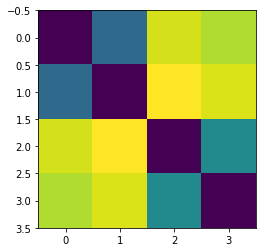

In [35]:
plt.imshow( cls_dist )
  